In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fibheap import FibonacciHeap as FibHeap
from peel_by_motif import *
from utils import *

import random
import pandas as pd
from datetime import datetime
from compare_algs.greedy_algorithms import *
import graph_tool.all as gt

In [2]:

plt.rcParams.update({'font.size': 16})

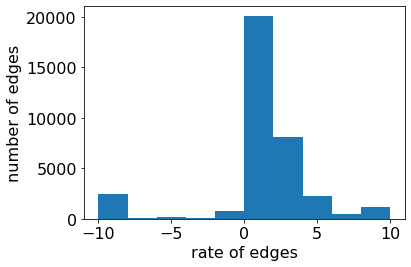

In [3]:
df = pd.read_csv('data/soc-sign-bitcoinotc.csv', names=['source','sink','rate','time'])
G = nx.from_pandas_edgelist(df, 'source', 'sink',['rate'], create_using=nx.DiGraph())
total_vs = plt.hist(df['rate'])
plt.xlabel('rate of edges')
plt.ylabel('number of edges')
plt.tight_layout()
plt.savefig('otc_total_rates.png')
plt.show()

In [4]:
len(G.nodes), len(G.edges)

(5881, 35592)

In [5]:
index = 0
gt_node_map = {}
for n in G.nodes:
    gt_node_map[n] = index
    index += 1
g = gt.Graph()
for row in df[['source','sink','rate']].values:
    g.add_edge(gt_node_map[row[0]], gt_node_map[row[1]])

In [6]:
start=datetime.now()
motif3 = gt.motifs(g, 3, return_maps=True)
print(datetime.now()-start)

0:00:18.579014


In [7]:
num_labeled_G = nx.relabel_nodes(G, gt_node_map)

0 153801


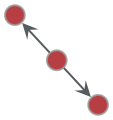

1 36648


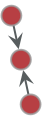

2 65143


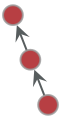

3 3706


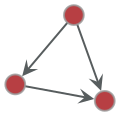

4 440712


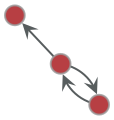

5 169731


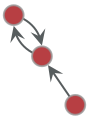

6 79


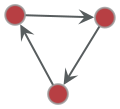

7 2910


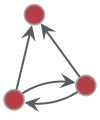

8 2048


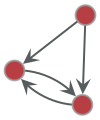

9 729665


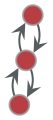

10 1621


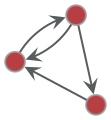

11 9377


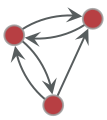

12 13752


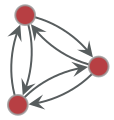

In [21]:
i = 0


for motif_shape in motif3[0]:
    print(i, motif3[1][i])
    i += 1
    pos = gt.sfdp_layout(motif_shape)
    gt.graph_draw(motif_shape,pos,output_size=(60,60))
#     gt.graph_draw(motif_shape,pos,output_size=(60,60), output='figs/motif/3motif_'+str(i)+'.pdf')
#     plt.savefig('figs/motif/3motif_'+str(i)+'.png')
    plt.show()

# Contrast m3 and m10

running time 0:00:20.142356
# of anomalies found (461,)
precision 0.7459546925566343


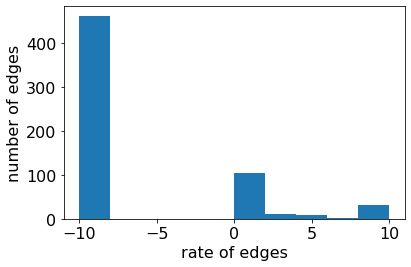

<ipython-input-9-e285825660a3>:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


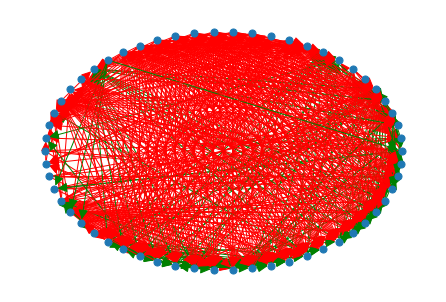

In [9]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][2]],1),([list(i) for i in motif3[2][9]],-1)]
for i in range(1):
#     print('!!', len(pairs[0][0]))
    start=datetime.now()
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    print('running time', datetime.now()-start)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = np.array(list(rates.values()))
    tmp = np.array(list(rates.values()))
    print('# of anomalies found',tmp[tmp<0].shape)
    vs = plt.hist(value_list)
    print('precision', len(value_list[value_list<0])/len(value_list))
    
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.tight_layout()
    plt.savefig('figs/bitcoin_otc/contrast_3_10_hist'+str(i)+'.png')
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.tight_layout()
    plt.savefig('figs/bitcoin_otc/contrast_3_10_shape'+str(i)+'.png')
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

# Contrast m3 and m13

running time 0:00:01.501980
# of anomalies found (595,)
precision 0.74375


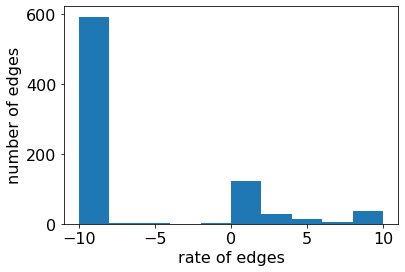

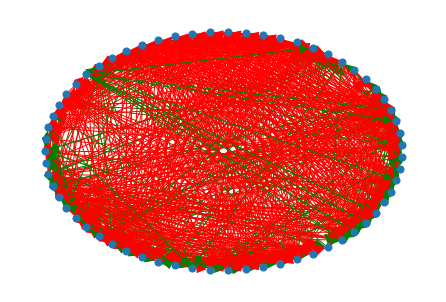

In [11]:


h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][2]],1),([list(i) for i in motif3[2][12]],-1)]
for i in range(1):
#     print('!!', len(pairs[0][0]))
    start=datetime.now()
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    print('running time', datetime.now()-start)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = np.array(list(rates.values()))
    tmp = np.array(list(rates.values()))
    print('# of anomalies found',tmp[tmp<0].shape)
    vs = plt.hist(value_list)
    print('precision', len(value_list[value_list<0])/len(value_list))
    
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
#     plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_3_10_hist'+str(i)+'.png')
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
#     plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_3_10_shape'+str(i)+'.png')
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

# Motifscope can give better result than simple motif dense subgraph

# Contrast m9 and m10

running time 0:00:19.081005
# of anomalies found (89,)
precision 0.7355371900826446


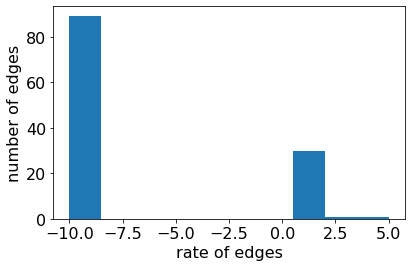

<ipython-input-8-cacaf2c9592c>:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


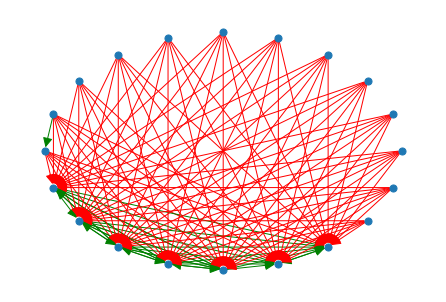

In [8]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][8]],1),([list(i) for i in motif3[2][9]],-1)]
for i in range(1):
#     print('!!', len(pairs[0][0]))
    start=datetime.now()
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    print('running time', datetime.now()-start)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = np.array(list(rates.values()))
    tmp = np.array(list(rates.values()))
    print('# of anomalies found',tmp[tmp<0].shape)
    vs = plt.hist(value_list)
    print('precision', len(value_list[value_list<0])/len(value_list))
    
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.show()
    
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

# Without contrast (only dense with m9)

(429,)


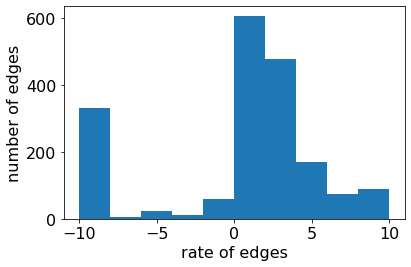

precision 0.23201730665224446


<ipython-input-12-87582b9a8df6>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


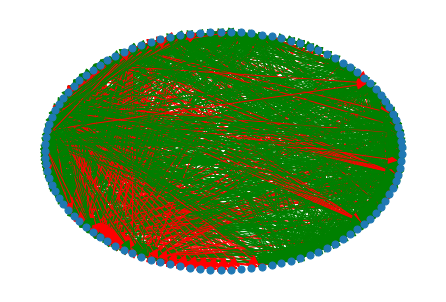

In [12]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][8]],1)]
for i in range(1):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = np.array(list(rates.values()))
    tmp = np.array(list(rates.values()))
    print(tmp[tmp<0].shape)
    vs = plt.hist(value_list)
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_9_10_hist'+str(i)+'.png')
    plt.show()
    print('precision', len(value_list[value_list<0])/len(value_list))
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_9_10_shape'+str(i)+'.png')
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs